In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Smoking Data.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Label Encoding

In [4]:
x = df.drop('smoker',axis=1)
y = df['smoker']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
for col in x.columns:
    if x[col].dtype == np.object:
        x[col] = le.fit_transform(x[col])

In [7]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


In [8]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Breaking the dataset

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, train_size=.7, random_state = 42) #we use random state for using the smae data

# Model Training

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(criterion = 'entropy')

In [11]:
clf.fit(xtrain,ytrain)
clf1.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
clf.score(xtrain, ytrain) # squard value

0.9989316239316239

In [13]:
clf.score(xtest, ytest) # squard value

0.6766169154228856

In [14]:
clf1.score(xtrain, ytrain) # squard value

0.9989316239316239

In [15]:
clf1.score(xtest, ytest) # squard value

0.6766169154228856

# Tree visualise

In [16]:
from sklearn import tree

In [17]:
x_features = x.columns

[Text(608.9318622819768, 639.2736000000001, 'bmi <= 40.532\nentropy = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(562.1055850290699, 613.1808000000001, 'bmi <= 37.085\nentropy = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(501.6734956395349, 587.0880000000001, 'bmi <= 37.06\nentropy = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(498.9051235465117, 560.9952000000001, 'bmi <= 34.102\nentropy = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(435.83071220930236, 534.9024000000001, 'bmi <= 32.933\nentropy = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(395.8474709302326, 508.80960000000005, 'bmi <= 32.425\nentropy = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(354.6381976744186, 482.71680000000003, 'bmi <= 31.808\nentropy = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(294.36662790697676, 456.624, 'children <= 2.5\nentropy = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(211.62906976744188, 430.5312, 'age <= 47.5\nentropy = 0.32\nsamples = 470\nvalue = [376,

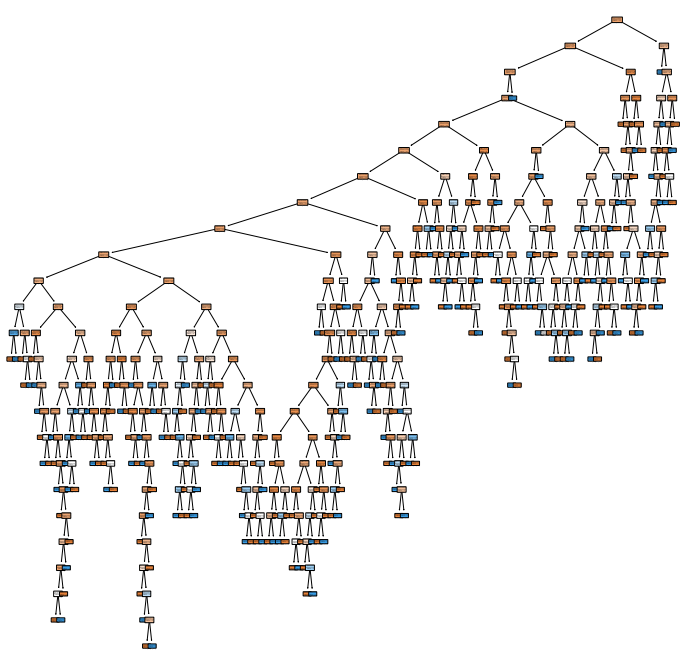

In [18]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)